# Linear Regression

> Used in machine learning to do Quantitative prediction

<img src="./assets/imgs/linear_regression.png" width="800px" />

- if you invest x amount in advertising, you will get x amount of sales


In [62]:
import pandas as pd

advertising = pd.read_csv("./assets/advertising.csv", index_col=0)

advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [63]:
print(advertising.shape)

(200, 4)


In [64]:
x = advertising[["TV", "Radio", "Newspaper"]]
y = advertising["Sales"]

In [65]:
x.shape

(200, 3)

In [66]:
y.shape

(200,)

/home/ricardo/Documents/code/learn/ai/machine_learning_python/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


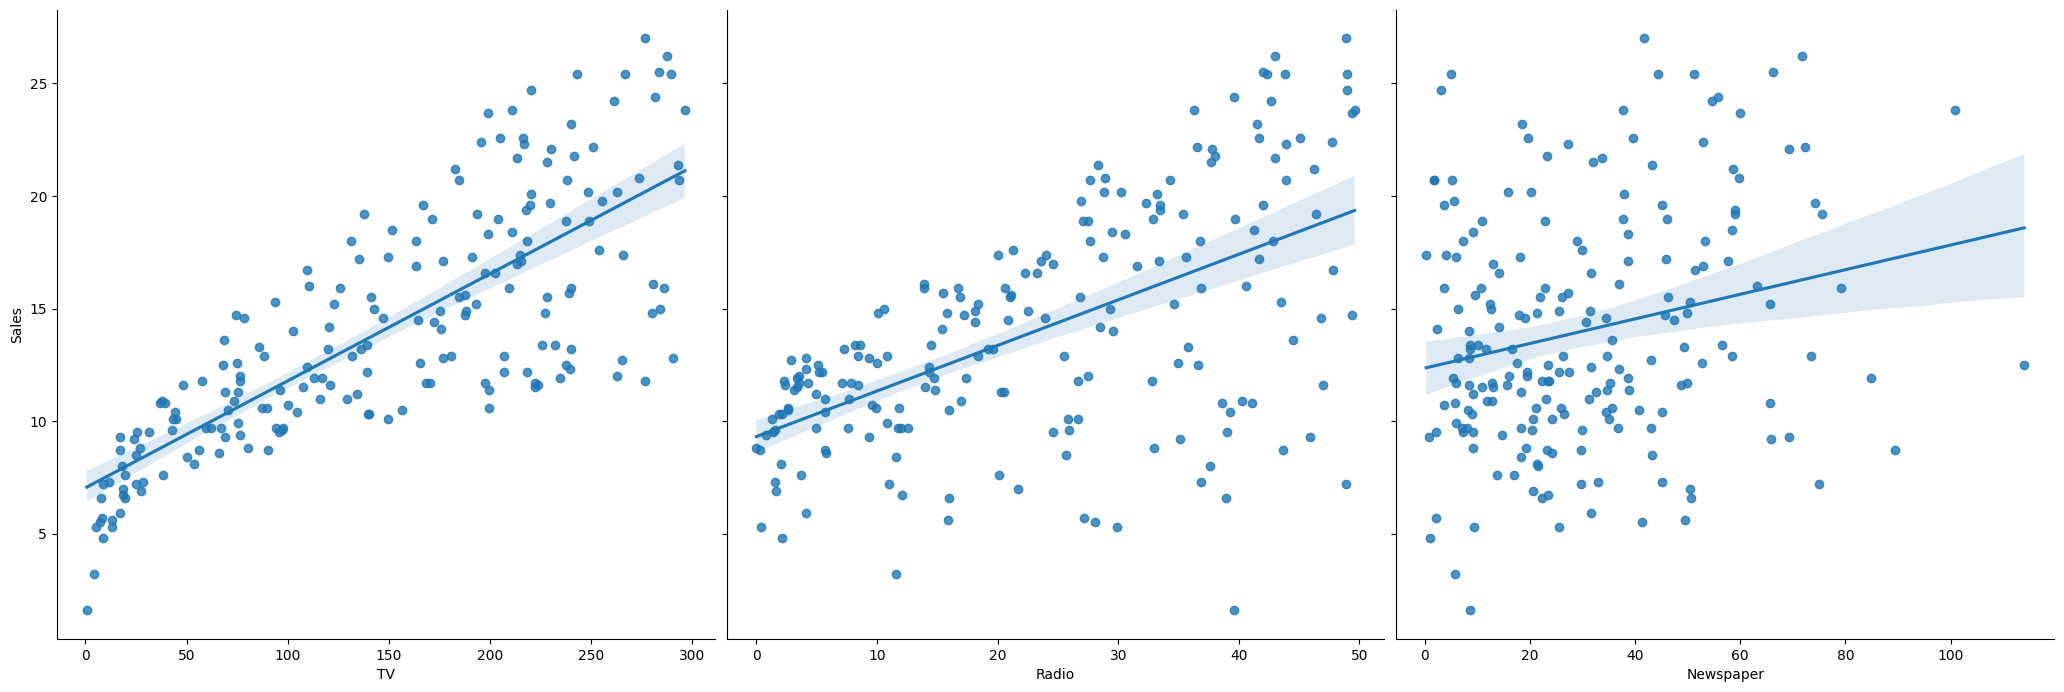

In [67]:
import seaborn as sns
sns.pairplot(
    advertising, 
    x_vars=["TV", "Radio", "Newspaper"], 
    y_vars="Sales",
    size=7,
    kind='reg'
)

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3
)

## Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression()

### Increase in sales for each unit invested in advertising

In [70]:
list(zip(['TV', 'Radio', 'Newspaper'], reglin.coef_))
# [
# ('TV', 0.045714328127464225),
# ('Radio', 0.18384206613455173),
# ('Newspaper', 0.003191709341167484)
# ]


[('TV', 0.04472270618247058),
 ('Radio', 0.19269598942610977),
 ('Newspaper', -0.009342117128173427)]

## Prediction

In [71]:
y_prediction = reglin.predict(x_test) 

In [72]:
y_prediction[0:5]

array([ 9.59396323, 19.10110052, 10.68668707, 20.50046148, 15.48073854])

In [73]:
y_test.head(5)

52     10.7
69     18.9
95     11.5
105    20.7
115    14.6
Name: Sales, dtype: float64

## Checking the performance

### MAE (Mean absolute error)

In [74]:
from sklearn import metrics

In [75]:
metrics.mean_absolute_error(y_test, y_prediction)

1.4045772392578175

### MSE (Mean squared error)
Mean but for each error squared it ex:
- 1 = 1
- 2 = 4
- 5 = 5

In [76]:
metrics.mean_squared_error(y_test, y_prediction)

4.014101218246358

### RMSE (Root mean squared error)
The same as MSE but square root it
It is the most common

In [77]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, y_prediction))

2.0035222030829503